# Indian Covid Predictor

<h4>COVID-19 India Cases March-May 2020</h4>

This data taken from COVID-19 India Cases from March-May 2020 from https://www.mohfw.gov.in/

This model is going to predict the no of deaths 

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\jai ganesh\Desktop\kaggle\covid19\data.csv")

In [4]:
df.head

<bound method NDFrame.head of          Date  Day  Cummulative total Cases  Cummulative total Deaths  \
0    1-Mar-20    1                        3                         0   
1    2-Mar-20    2                        5                         0   
2    3-Mar-20    3                        6                         0   
3    4-Mar-20    4                       28                         0   
4    5-Mar-20    5                       30                         0   
..        ...  ...                      ...                       ...   
68   8-May-20   69                    56342                      1886   
69   9-May-20   70                    59662                      1981   
70  10-May-20   71                    62939                      2109   
71  11-May-20   72                    67152                      2206   
72  12-May-20   73                    70756                      2293   

    Cummulative total recovered  
0                             0  
1                        

In [5]:
df

,Date,Day,Cummulative total Cases,Cummulative total Deaths,Cummulative total recovered
0,1-Mar-20,1,3,0,0
1,2-Mar-20,2,5,0,0
2,3-Mar-20,3,6,0,0
3,4-Mar-20,4,28,0,0
4,5-Mar-20,5,30,0,0
...,...,...,...,...,...
68,8-May-20,69,56342,1886,16540
69,9-May-20,70,59662,1981,17847
70,10-May-20,71,62939,2109,19358
71,11-May-20,72,67152,2206,20917


In [6]:
df.describe()

,Day,Cummulative total Cases,Cummulative total Deaths,Cummulative total recovered
count,73.000000,73.000000,73.000000,73.000000
mean,37.000000,14459.301370,466.931507,3529.753425
std,21.217131,19476.325928,644.625781,5804.157047
min,1.000000,3.000000,0.000000,0.000000
25%,19.000000,173.000000,4.000000,20.000000
50%,37.000000,4281.000000,111.000000,319.000000
75%,55.000000,23452.000000,723.000000,4814.000000
max,73.000000,70756.000000,2293.000000,22455.000000


In [8]:
df.isna()

,Date,Day,Cummulative total Cases,Cummulative total Deaths,Cummulative total recovered
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
68,False,False,False,False,False
69,False,False,False,False,False
70,False,False,False,False,False
71,False,False,False,False,False


In [10]:
df.isna().sum()

Date                           0
Day                            0
Cummulative total Cases        0
Cummulative total Deaths       0
Cummulative total recovered    0
dtype: int64

In [11]:
df.dtypes

Date                           object
Day                             int64
Cummulative total Cases         int64
Cummulative total Deaths        int64
Cummulative total recovered     int64
dtype: object

<h4> Feature Selection</h4>

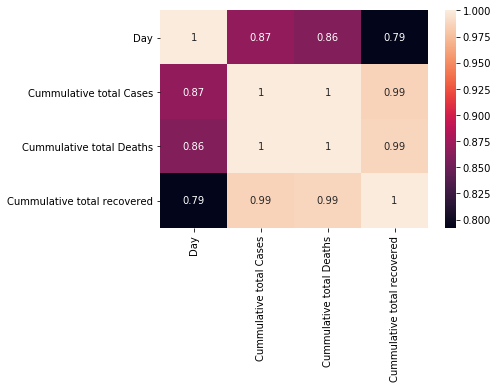

In [14]:
corr=df.corr() #gives correlation of each feature
sns.heatmap(corr,annot=True)

<h3>preprocessing</h3>


In [21]:
df=df.rename(columns={'Cummulative total Cases':'ct_cases','Cummulative total Deaths':'ct_Deaths','Cummulative total recovered':'ct_recovered'})

In [22]:
df.columns

Index(['Date', 'Day', 'ct_cases', 'ct_Deaths', 'ct_recovered'], dtype='object')

In [23]:
x=df[['ct_cases','ct_recovered','Day']]
y=df['ct_Deaths']

<H4>Model Creation</H4>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred=model.predict(x_test)

In [33]:
#calculatimg Score
from sklearn.metrics import r2_score,mean_squared_error
print("r^2 score :",r2_score(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))

r^2 score : 0.9991749226674255
MSE : 246.58886753290383
